In [11]:
import numpy as np
import numpy.ma as ma
import scipy.stats as stats

from astropy.io import fits
from astropy.io import registry
import astropy.wcs as wcs
import astropy.units as u
from astropy.table import Table
from astropy.nddata import NDDataArray, CCDData, NDUncertainty, StdDevUncertainty, VarianceUncertainty, InverseVariance
from astropy.visualization import simple_norm, ZScaleInterval , ImageNormalize
from astropy.visualization.stretch import SinhStretch,  LinearStretch

import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import matplotlib.colors as mpcolors
from matplotlib import ticker
from matplotlib.lines import Line2D
from pdrtpy.pdrutils import PDRutils
from pdrtpy.measurement import Measurement

plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 300
#import sys
#np.set_printoptions(threshold=sys.maxsize)


In [12]:
dir="/home/mpound/Dropbox/PDRmodels/"
cii_flux_file=dir+"n22_cii_convol_mips70.fits"
cii_err_file=dir+"n22_cii_err_convol_mips70.fits"
cii_combined_file="n22_cii_flux_error.fits"
oi_flux_file=dir+"n22_oi_regrid_convol_mips70.fits"
oi_combined_file="n22_oi_flux_error.fits"
oi_err_file=dir+"n22_oi_err_regrid_convol_mips70.fits"
TIR_flux_file=dir+"n22_TIR.fits"
TIR_combined_file="n22_TIR__flux_error.fits"


In [13]:
Measurement.makemeasurement(cii_flux_file,cii_err_file,cii_combined_file)
Measurement.makemeasurement(oi_flux_file,oi_err_file,oi_combined_file)
#Measurement.makemeasurement(TIR_flux_file,errorfile='rms',outfile=TIR_combined_file,rms=3E-6)
Measurement.makemeasurement(TIR_flux_file,error='10%',outfile=TIR_combined_file)

(139, 81)
(139, 81)
(139, 81)


In [14]:
m1 = Measurement.read(cii_combined_file,identifier="CII_158")
m2 = Measurement.read(TIR_combined_file,identifier="FIR")
m3 = Measurement.read(oi_combined_file,identifier="OI_63")

In [15]:
m3.write("junk.fits",overwrite=True)
m22 = Measurement(data=10.,uncertainty = StdDevUncertainty(2.),identifier="CI_609",unit="adu")
m22.write("junk.fits",overwrite=True)

In [16]:
p = PDRutils("current_models.tab",measurements = [m3,m2,m1])
psmc = PDRutils("smc_models.tab",measurements = [m3,m2,m1])
pk = PDRutils("kosma_models.tab",measurements = [m3,m2,m1])
#print("Files")
#for x in p.find_files(p.measurementIDs): print(x)
#print("Pairs")
#for x in p.find_pairs(p.measurementIDs): print(x)
#p.ratiocount

In [17]:
print(m1[75,40],m2[75,40],m3[75,40])
print(m1.error[75,40],m2.error[75,40],m3.error[75,40])
print(m1[115,25],m2[115,25],m3[115,25])
print(m1.error[115,25],m2.error[115,25],m3.error[115,25])

6.758856e-08 1.0890726386345434e-05 1.6821105e-08
1.3707998e-09 1.0890726386345434e-06 3.3952883e-09
1.3940442e-07 1.75674209964662e-05 6.523444e-08
1.8292737e-09 1.75674209964662e-06 3.406907e-09


In [20]:
p.read_models(unit='adu')
p.computeValidRatios()
p.check_ratio_shapes()
psmc.read_models(unit='adu')
psmc.computeValidRatios()
psmc.check_ratio_shapes()
pk.read_models(unit='adu')
pk.computeValidRatios()
pk.check_ratio_shapes()
#plt.imshow(p._measurements['OI_63'],origin='lower',cmap='rainbow')
#plt.colorbar()
pk.ratiocount
#p._chisq.data.shape

OI_63+CII_158/FIR
OI_63+CII_158/FIR
OI_63+CII_158/FIR


2

In [21]:
if False:
    plt.rcParams["figure.dpi"] = 100
    q=p._reducedChisq.data[:,3,110,25]
    z=np.nanmin(p._reducedChisq,(0,1))
    print(np.nanmax(z))
    #z=p._observedratios['OI_145+CII_158/FIR']
    #z=p._observedratios['OI_145/CII_158']
    #z=p._deltasq['OI_145+CII_158/FIR']
    plt.imshow(z,origin='lower')
    plt.colorbar()
    #np.nanmin(p._reducedChisq)

In [22]:
p.computeDeltaSqMap()
p.computeChisq()
psmc.computeDeltaSqMap()
psmc.computeChisq()
pk.computeDeltaSqMap()
pk.computeChisq()

ValueError: operands could not be broadcast together with shapes (25,17,139,81) (29,25,139,81) 

In [ ]:
print(p._chisq.shape)
p.computeBestnG0Maps()
print(p.g0_map._data[115,25],p.n_map._data[115,25])
psmc.computeBestnG0Maps()
print(psmc.g0_map._data[115,25],psmc.n_map._data[115,25])
pk.computeBestnG0Maps()
print(pk.g0_map._data[115,25],pk.n_map._data[115,25])

In [ ]:
#plt.imshow(m1.SN)
#plt.colorbar()

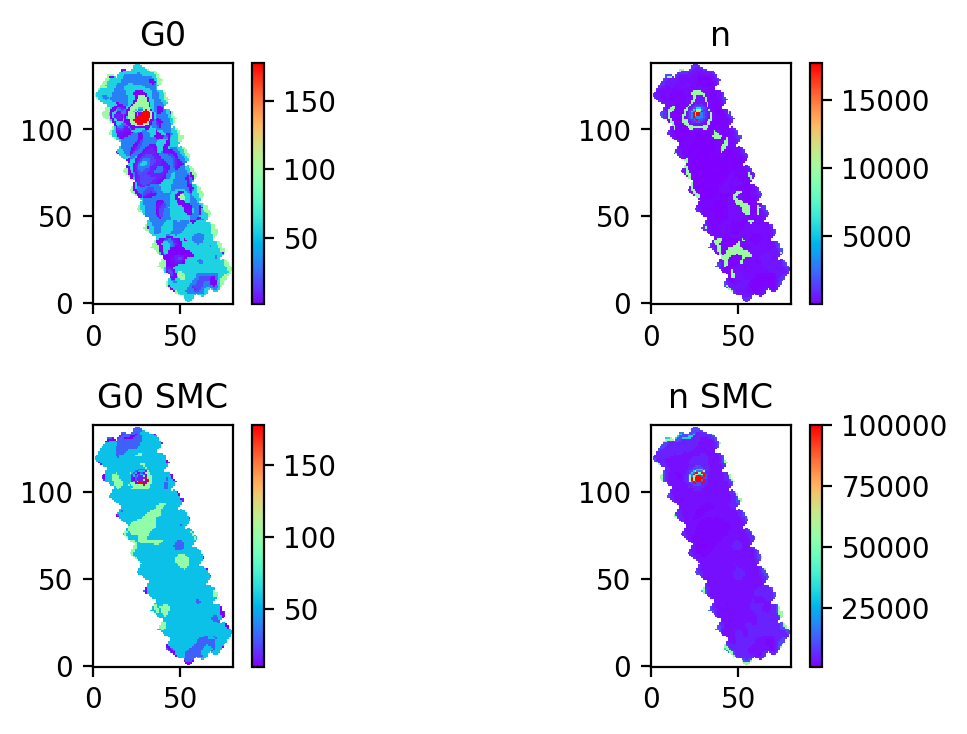

In [87]:
plt.rcParams["figure.dpi"] = 200
plt.subplot(2,2,1)
current_cmap = mcm.get_cmap('rainbow')
current_cmap.set_bad(color='white')
plt.imshow(p.g0_map,cmap=current_cmap,origin='lower')#,norm=p._zscale(p.g0_map),origin='lower')
plt.title("G0")
plt.colorbar()
plt.subplot(2,2,2)
plt.imshow(np.ma.array(p.n_map, mask=np.isnan(p.n_map)),cmap=current_cmap,origin='lower')#,norm=p._zscale(np.ma.array(p.n_map, mask=np.isnan(p.n_map))),origin='lower')
plt.title("n")
plt.colorbar()
plt.subplot(2,2,3)
if False:
    plt.imshow(psmc.g0_map,cmap=current_cmap,origin='lower')
    plt.title("G0 SMC")
else:
    plt.imshow(pk.g0_map,cmap=current_cmap,origin='lower')
    plt.title("G0 KOSMA")
plt.colorbar()
plt.subplot(2,2,4)
if False:
    plt.imshow(np.ma.array(psmc.n_map, mask=np.isnan(psmc.n_map)),cmap=current_cmap,origin='lower')#,norm=p._zscale(np.ma.array(p.n_map, mask=np.isnan(p.n_map))),origin='lower')
    plt.title("n SMC")
else:
    plt.imshow(pk.n_map,cmap=current_cmap,origin='lower')#,norm=p._zscale(np.ma.array(p.n_map, mask=np.isnan(p.n_map))),origin='lower')
    plt.title("n KOSMA")
plt.colorbar()
plt.subplots_adjust(hspace=0.5,wspace=0.5)

In [ ]:
hh=p.n_map.to_hdu()
hh.writeto('nmapsmc.fits',overwrite=True)
hh=p.g0_map.to_hdu()
hh.writeto('g0mapsmc.fits',overwrite=True)
x1=fits.open('nmapsmc.fits')

In [ ]:
x1=fits.open('nmapsmc.fits')
x2=fits.open('/n/dropbox1nb/mpound/Dropbox/PDRmodels/smc_pdrmodels/n22/n22_density.fits')
#H,bins = np.histogram(x1[0].data-x2[0].data,range=[10,200])
#plt.bar(bins[:,-1],H,width=50)
#v3=x1[0].data-x2[0].data
#plt.hist(v3[~np.isnan(v3)],bins=20)
x3=Measurement.read('nmapsmc.fits',identifier="MWP",uncertainty=None)
x4=Measurement.read('/n/dropbox1nb/mpound/Dropbox/PDRmodels/smc_pdrmodels/n22/n22_density.fits',identifier="KJ",uncertainty=None)
x3._unit=u.dimensionless_unscaled
x4._unit=u.dimensionless_unscaled
v3=x3 -x4
x5=Measurement.read('g0mapsmc.fits',identifier="MWP",uncertainty=None)
x6=Measurement.read('/n/dropbox1nb/mpound/Dropbox/PDRmodels/smc_pdrmodels/n22/n22_radiation.fits',identifier="KJ",uncertainty=None)
x5._unit=u.dimensionless_unscaled
x6._unit=u.dimensionless_unscaled
v4=x5-x6
plt.subplot(1,2,1)
plt.hist(v3[~np.isnan(v3)],bins=30,range=[0,30])
plt.title("n SMC difference histogram")
plt.subplot(1,2,2)
plt.hist(v4[~np.isnan(v4)],bins=30,range=[0,30])
plt.title("G0 SMC difference histogram")
plt.subplots_adjust(wspace=1)

In [ ]:
k=p._firstkey(p._deltasq)
#np.max(p._deltasq[k])
plt.imshow(ma.masked_invalid(p._deltasq[k][21][3]))
#plt.imshow(ma.masked_invalid(p._reducedChisq[0][0]))
plt.colorbar()
#f=ma.masked_invalid(p._chisq[0][0])
#y=plt.hist(f)
p._deltasq[k].shape
len(p._deltasq)

In [ ]:
z=ma.masked_invalid(p._deltasq[k])

In [ ]:
z[0][0].shape

In [ ]:
f=fits.open(cii_flux_file)
z=ma.masked_invalid(f[0].data)
z.max()

In [ ]:
y=plt.hist(ma.compressed(z),bins=200)


In [16]:
np.shape(p._reducedChisq.data[0])

(25, 139, 81)

In [28]:
np.shape(p._reducedChisq.data[0,0,0,:])

(81,)

In [53]:
z,y,x=p._reducedChisq.data[0,:,0,0],p._reducedChisq.data[0,0,:,0],p._reducedChisq.data[0,0,0,:]

In [82]:
y=np.arange(0,139)
x=np.arange(0,81)
X, Y = np.meshgrid(x, y)

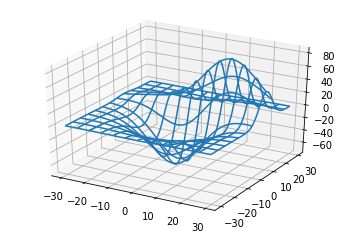

In [34]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

In [35]:
x

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [54]:
X, Y = np.meshgrid(x, y)

In [83]:
np.shape(Y)

(139, 81)

In [98]:
Z=psmc._reducedChisq.data[0,0]
np.shape(Z)
np.nanmin(Z)

0.4200602909830787

/n/algol2/mpound/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  after removing the cwd from sys.path.


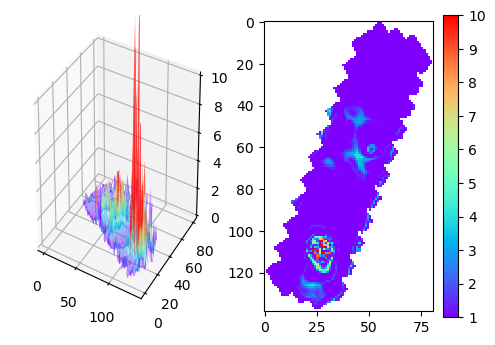

In [130]:
plt.rcParams["figure.dpi"] = 100
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(Y,X, z,cmap='rainbow',vmin=0,vmax=3,alpha=0.5)
#ax.axes.set_xlim3d(left=0, right=10) 
#ax.axes.set_ylim3d(bottom=0, top=10) 
ax.axes.set_zlim3d(bottom=0, top=10)
ax2=fig.add_subplot(122)
im2=ax2.imshow(z,cmap='rainbow',vmin=1,vmax=10)
fig.colorbar(im2, ax=ax2)
#plt.colorbar(ax=ax2)
plt.show()

In [95]:
np.nanmin(p._reducedChisq[1])

0.73427931642151

In [97]:
z=np.amin(p._reducedChisq,(0,1))

In [100]:
np.nanmin(z)

7.553433565962912e-06

In [101]:
np.shape(z)

(139, 81)